In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
#Inspecting data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

__Drop _c39__


In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
df.duplicated().sum()

0

Univariate Analysis

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
#exploring Target Variable
df.fraud_reported.value_counts(normalize = True)

fraud_reported
N    0.753
Y    0.247
Name: proportion, dtype: float64

Exploratory Data Analysis on Numerical columns

Descriptive Statistics: Provides a snapshot of the data's central tendency and dispersion.


Outlier Detection: Helps identify unusual data points that may need investigation or treatment.

Shapiro's Normality Test: Determines if the data distribution deviates from normality, informing the choice of statistical tests and models.

Visualizations: Offer intuitive insights into the data distribution, variability, and potential anomalies.

In [10]:


def univariate_analysis(df, cols=None, output_dir=None):
    """
    Performs comprehensive univariate analysis on numerical features.

    Parameters:
    - df: pandas DataFrame containing the data.
    - cols: list of columns to analyze. If None, all numerical columns are analyzed.
    - output_dir: directory to save plots. If None, plots are displayed but not saved.

    Returns:
    - analysis_results: A dictionary containing analysis results for each column.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    analysis_results = {}
    
    for col in cols:
        print(f"\nAnalyzing '{col}':")
        data = df[col].dropna()
        results = {}
        
        # Descriptive Statistics
        results['count'] = data.count()
        results['mean'] = data.mean()
        results['median'] = data.median()
        results['mode'] = data.mode().tolist()
        results['std_dev'] = data.std()
        results['variance'] = data.var()
        results['min'] = data.min()
        results['max'] = data.max()
        results['range'] = data.max() - data.min()
        results['skewness'] = data.skew()
        results['kurtosis'] = data.kurtosis()
        results['quantiles'] = data.quantile([0.25, 0.5, 0.75]).to_dict()
        
        # Distribution
        # Outlier Detection using IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        results['num_outliers'] = len(outliers)
        results['outlier_values'] = outliers.tolist()
        
        # Normality Test
        # If p > 0.05, data is considered normally distributed
        if len(data) >= 3 and len(data) <= 5000:
            stat, p_value = stats.shapiro(data)
            results['normality_test'] = 'Shapiro-Wilk'
        else:
            stat, p_value = stats.normaltest(data)
            results['normality_test'] = 'D\'Agostino and Pearson'
        results['normality_pvalue'] = p_value
        results['is_normal_distribution'] = p_value > 0.05  
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram and KDE
        sns.histplot(data, kde=True, ax=axes[0, 0], color='skyblue')
        axes[0, 0].set_title(f'Histogram of {col}')
        
        # Boxplot
        sns.boxplot(x=data, ax=axes[0, 1], color='lightgreen')
        axes[0, 1].set_title(f'Boxplot of {col}')
        
        # QQ Plot
        stats.probplot(data, dist="norm", plot=axes[1, 0])
        axes[1, 0].set_title(f'QQ Plot of {col}')
        
        # Violin Plot
        sns.violinplot(x=data, ax=axes[1, 1], color='lightcoral')
        axes[1, 1].set_title(f'Violin Plot of {col}')
        
        plt.tight_layout()
        
        if output_dir:
            plt.savefig(f'{output_dir}/{col}_analysis.png')
            plt.close()
        else:
            plt.show()
        
        # Store the results
        analysis_results[col] = results
        
        # Print the summary
        summary_df = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
        
        
    return print(summary_df)



Analyzing 'age':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


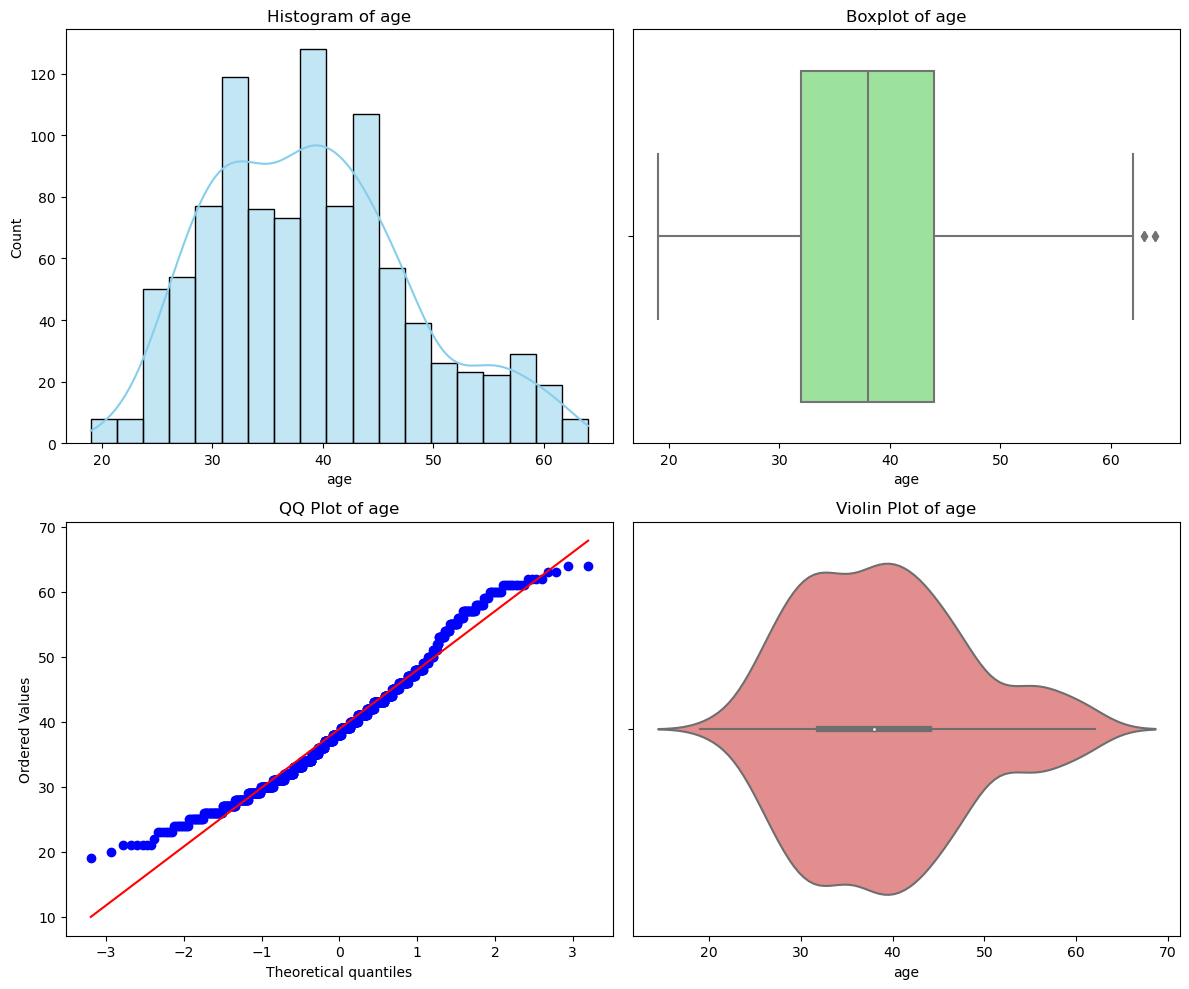

                                                      Value
count                                                  1000
mean                                                 38.948
median                                                 38.0
mode                                                   [43]
std_dev                                            9.140287
variance                                          83.544841
min                                                      19
max                                                      64
range                                                    45
skewness                                           0.478988
kurtosis                                          -0.260255
quantiles               {0.25: 32.0, 0.5: 38.0, 0.75: 44.0}
num_outliers                                              4
outlier_values                             [64, 63, 64, 63]
normality_test                                 Shapiro-Wilk
normality_pvalue                        

In [11]:
#Using the function

univariate_analysis(df, cols=['age'], output_dir=None)


Analyzing 'months_as_customer':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


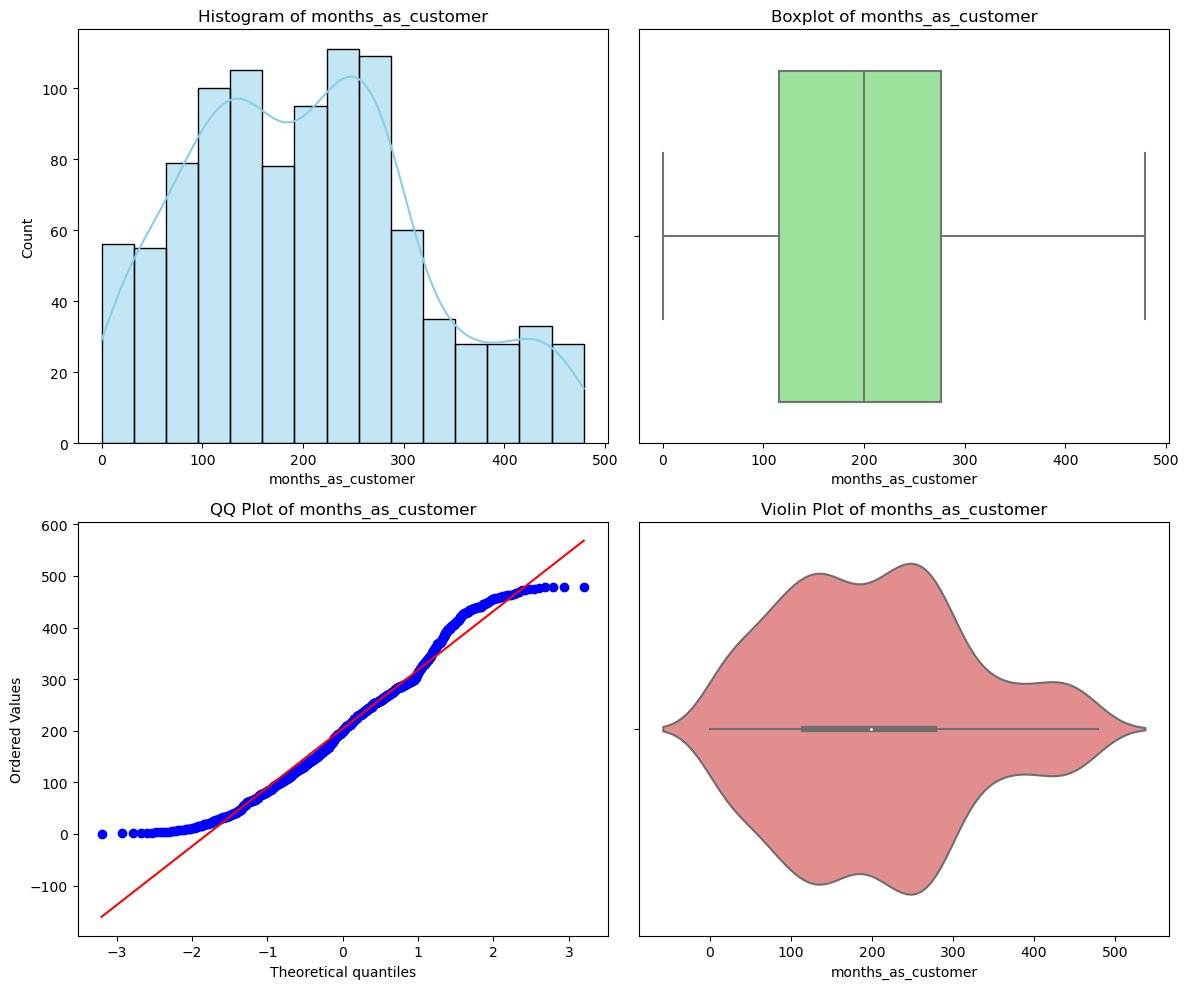

                                                           Value
count                                                       1000
mean                                                     203.954
median                                                     199.5
mode                                                       [194]
std_dev                                               115.113174
variance                                            13251.042927
min                                                            0
max                                                          479
range                                                        479
skewness                                                0.362177
kurtosis                                               -0.485428
quantiles               {0.25: 115.75, 0.5: 199.5, 0.75: 276.25}
num_outliers                                                   0
outlier_values                                                []
normality_test           

In [12]:
univariate_analysis(df, cols=['months_as_customer'], output_dir=None)


Analyzing 'policy_number':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


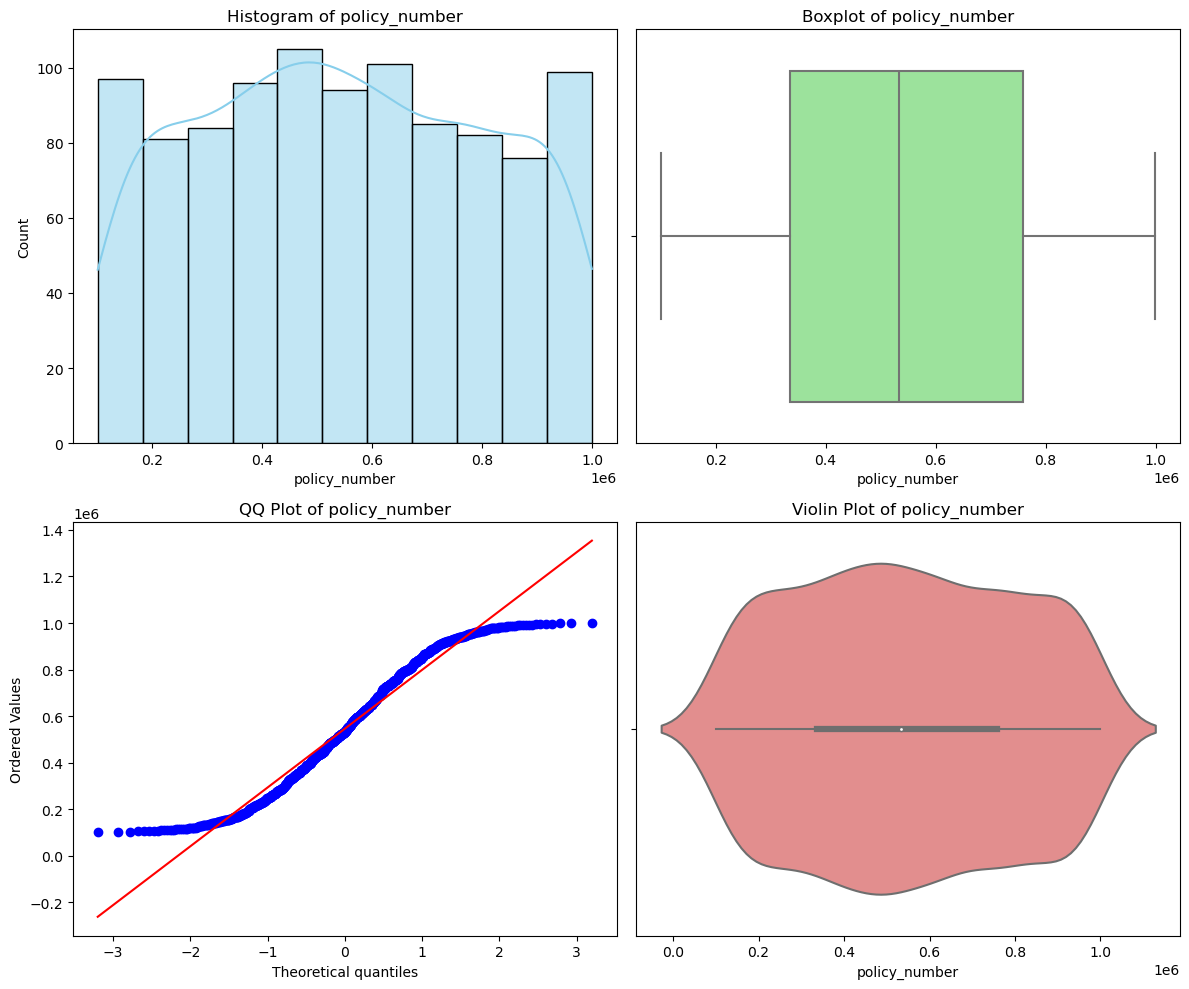

                                                                    Value
count                                                                1000
mean                                                           546238.648
median                                                           533135.0
mode                    [100804, 101421, 104594, 106186, 106873, 10718...
std_dev                                                     257063.005276
variance                                               66081388681.315422
min                                                                100804
max                                                                999435
range                                                              898631
skewness                                                         0.038991
kurtosis                                                        -1.132638
quantiles               {0.25: 335980.25, 0.5: 533135.0, 0.75: 759099.75}
num_outliers                          

In [13]:
univariate_analysis(df, cols=['policy_number'], output_dir=None)


Analyzing 'policy_deductable':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


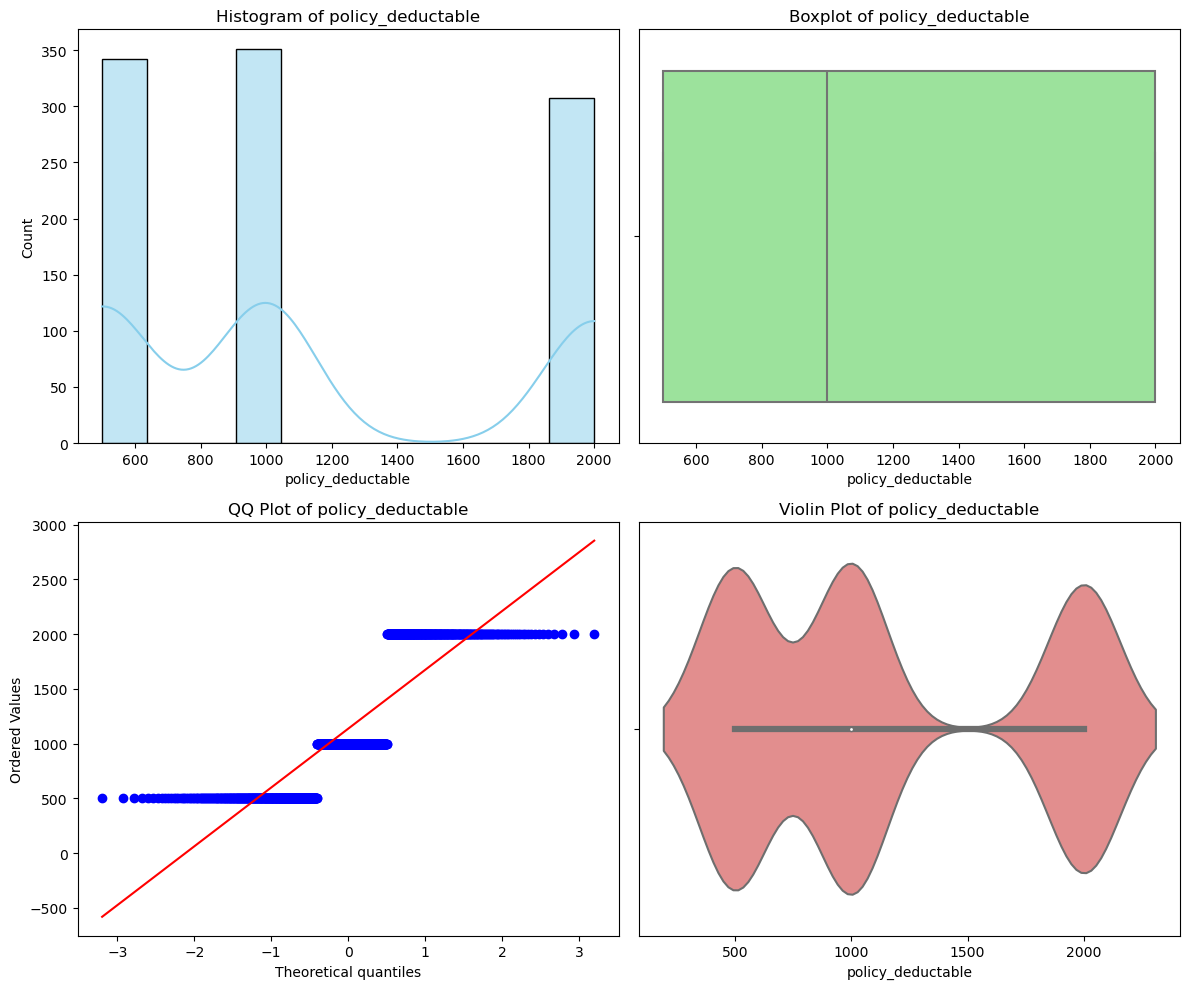

                                                           Value
count                                                       1000
mean                                                      1136.0
median                                                    1000.0
mode                                                      [1000]
std_dev                                               611.864673
variance                                           374378.378378
min                                                          500
max                                                         2000
range                                                       1500
skewness                                                0.477887
kurtosis                                               -1.376943
quantiles               {0.25: 500.0, 0.5: 1000.0, 0.75: 2000.0}
num_outliers                                                   0
outlier_values                                                []
normality_test           

In [14]:
univariate_analysis(df, cols=['policy_deductable'], output_dir=None)